### 1.1 数据的导入和清理

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
# Use California House Dataset
df = pd.read_csv("California-House-Price.csv")

In [2]:
# Split dataset when it looks like:
# longtitude;latitude;median_age;total_rooms;etc..
# DO NOT RUN in this case
data = pd.read_csv("California-House-Price.csv", sep=';')

In [3]:
df.shape

(20640, 10)

In [4]:
df.head() # return first five rows
df.tail()
df.head(20) # return first 20 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [5]:
df_Split = df.copy()
df_Split.head()
split = df_Split['longitude'].astype(str).str.split(".")
"""
df_Split['longitude_int'] = split[0]
df_Split['longitude_frac'] = split[1]
df_Split.head(20)
"""

"\ndf_Split['longitude_int'] = split[0]\ndf_Split['longitude_frac'] = split[1]\ndf_Split.head(20)\n"

In [6]:
# Dropping rows by value:
df_DROP_OVER_AGE_50 = df.drop(df[df.housing_median_age > 50].index)
df_DROP_OVER_AGE_50.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
15,-122.26,37.85,50,1120,283.0,697,264,2.1250,140000,NEAR BAY
18,-122.26,37.84,50,2239,455.0,990,419,1.9911,158700,NEAR BAY


In [7]:
# Select rows with specific attribute
df_NEARBAY = df[df['ocean_proximity'] == 'NEAR BAY']
df_NEARBAY.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [8]:
# Change the value in rows
df_NEARBAY_AS_1 = df.copy() 
# Since the df is a reference to the original dataframe
# If simply df_NA1 = df, any modification on df_NA1 would apply on df also
# Similarly, changes in subset also change the original dataframe, like df_sub = df[0:1]

In [9]:
df_NEARBAY_AS_1['ocean_proximity'] = (df_NEARBAY_AS_1.ocean_proximity=='NEAR BAY')*1
# df_NEARBAY_AS_1['ocean_proximity'] = (df_NEARBAY_AS_1.ocean_proximity=='NEAR BAY')
# Turns the value in cell into True if it is near bay, false otherwise. *1 turns it into 1 and 0
df_NEARBAY_AS_1.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,1
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,1
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,1
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,1
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,1
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,1
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,1
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,1
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,1
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,1


### 1.2 数据的预处理

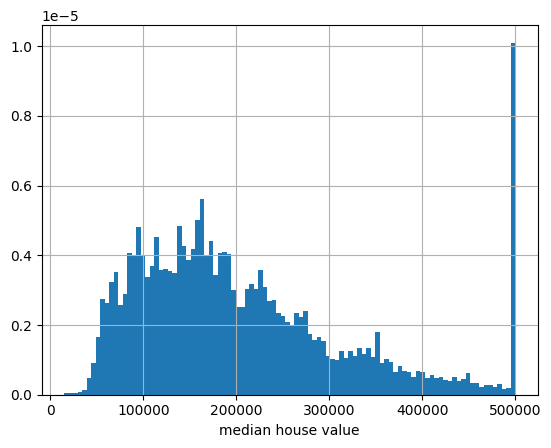

500001 14999 206855.81690891474


In [10]:
df.head(20)
df.median_house_value.hist(bins = 100, density = True)
plt.xlabel("median house value")
plt.show()
print(np.max(df['median_house_value']), np.min(df['median_house_value']), np.mean(df['median_house_value']))

In [11]:
# One-hot encoding - 用二进制向量来进行变量分类, 例如: ['A', 'B', 'C'] = 100, 010, 001
encoded_df = pd.get_dummies(df, columns=["ocean_proximity"])
encoded_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,False,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,False,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,False,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,False,True,False,False,False


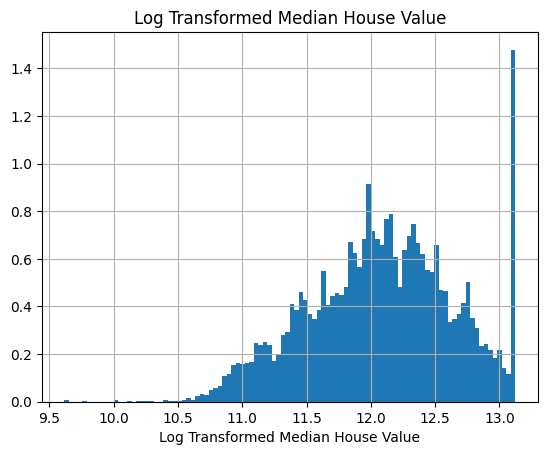

In [12]:
# 取自然对数, 减小方差的同时维持单调性, 一般用于value/spent等
encoded_df['log_median_house_value'] = np.log(encoded_df['median_house_value'])
encoded_df.log_median_house_value.hist(bins = 100, density=True)
plt.title("Log Transformed Median House Value")
plt.xlabel("Log Transformed Median House Value")
plt.show()

In [13]:
# 建立常规设计矩阵 X: 其它参数 y: 目标参数
encoded_df = encoded_df.dropna()
X = encoded_df.drop(columns=['median_house_value', 'log_median_house_value'])
y = encoded_df['log_median_house_value']
X.shape, y.shape

((20433, 13), (20433,))

In [14]:
# 设计矩阵 - 多项式拓展: 解决线性回归的欠拟合问题
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# include_bias 可以除去全为1的列, 
poly_X = poly.fit_transform(X)
poly_X.shape
"""
plt.scatter(X, y, color='navy', s=30, marker='o', label="training points")
reg = LinearRegression().fit(poly_X, y)
y_pred = reg.predict(poly_X)
plt.plot(X, y_pred, color='yellowgreen', label=f"degree {degree}")
plt.legend()
plt.title("Polynomial Regression")
plt.show()
"""

'\nplt.scatter(X, y, color=\'navy\', s=30, marker=\'o\', label="training points")\nreg = LinearRegression().fit(poly_X, y)\ny_pred = reg.predict(poly_X)\nplt.plot(X, y_pred, color=\'yellowgreen\', label=f"degree {degree}")\nplt.legend()\nplt.title("Polynomial Regression")\nplt.show()\n'

In [15]:
from sklearn.preprocessing import StandardScaler 